In [2]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END

#Reducers
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [5]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
def superbot(state: State):
    return {"messages": [llm.invoke(state['messages'])]}

In [7]:
graph = StateGraph(State)

graph.add_node("SuperBot",superbot)

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder = graph.compile(checkpointer = memory)

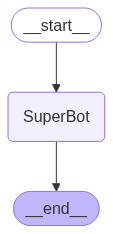

In [8]:
graph_builder

In [9]:
## Innvocation
config = {"configurable":{"thread_id":"1"}}
graph_builder.invoke({"messages":"Hi, My name is Prince and I like Cricket, Chess and Volleyball"},config = config)

{'messages': [HumanMessage(content='Hi, My name is Prince and I like Cricket, Chess and Volleyball', additional_kwargs={}, response_metadata={}, id='6fa0e330-878e-4315-94ad-b30476eaf4fd'),
  AIMessage(content="Nice to meet you, Prince! It sounds like you enjoy a good mix of sports and strategy games!\n\nCricket, Chess, and Volleyball are all great interests. Cricket is an exciting sport, especially with its rich history and global following. Chess is a fantastic game that requires skill, strategy, and critical thinking. And Volleyball is an awesome team sport that's perfect for staying active and having fun with friends.\n\nWhich one of these interests do you enjoy the most, or do you find that you enjoy them all equally? Do you play in a team or with friends, or do you prefer to play solo? I'm here to chat and learn more about your interests!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 133, 'prompt_tokens': 24, 'total_tokens': 157, 'completion_time'

In [10]:
## Streaming
config = {"configurable":{"thread_id":"2"}}

for chunk in graph_builder.stream({"messages":"Hi, My name is Prince and I like Cricket, Chess and Volleyball"},config = config, stream_mode = "updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='Hello Prince! Nice to meet you!\n\nIt sounds like you enjoy a good mix of sports and strategy games! Cricket, Chess, and Volleyball are all great activities that require different skills and mental approaches.\n\nWhich one of these activities do you enjoy the most? Do you play them competitively or just for fun?\n\n(By the way, Prince is a great name! Are you a fan of the musician Prince, or did your parents choose the name for another reason?)', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 24, 'total_tokens': 117, 'completion_time': 0.212218439, 'prompt_time': 0.003076184, 'queue_time': 0.062858672, 'total_time': 0.215294623}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a1785737-9f63-47af-8f1e-d73690f33c70-0', usage_metadata={'input_tokens': 24, 'output

In [11]:
for chunk in graph_builder.stream({"messages":"Hi, My name is Prince and I like Cricket, Chess and Volleyball"},config = config, stream_mode = "values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Prince and I like Cricket, Chess and Volleyball', additional_kwargs={}, response_metadata={}, id='b6f9b481-eb7f-4ab6-8bda-706500afb405'), AIMessage(content='Hello Prince! Nice to meet you!\n\nIt sounds like you enjoy a good mix of sports and strategy games! Cricket, Chess, and Volleyball are all great activities that require different skills and mental approaches.\n\nWhich one of these activities do you enjoy the most? Do you play them competitively or just for fun?\n\n(By the way, Prince is a great name! Are you a fan of the musician Prince, or did your parents choose the name for another reason?)', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 24, 'total_tokens': 117, 'completion_time': 0.212218439, 'prompt_time': 0.003076184, 'queue_time': 0.062858672, 'total_time': 0.215294623}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_79da0e0073', 'ser

In [12]:
for chunk in graph_builder.stream({"messages":"I also like plauying volleyball more"},config = config, stream_mode = "updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="So, volleyball is your top favorite among the three! What is it about volleyball that you enjoy the most? Is it the fast-paced action, the teamwork aspect, or something else?\n\nDo you play volleyball competitively, like in a school team or a local club, or is it more of a recreational activity for you?\n\nAlso, I'm curious - do you think your skills in volleyball have helped you in any way with your other interests, like cricket or chess? For example, do you think your hand-eye coordination from volleyball has helped you with your cricket batting or your chess focus?\n\n(By the way, I'm glad we got to have this conversation, Prince! You're a great conversationalist!)", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 281, 'total_tokens': 421, 'completion_time': 0.320739928, 'prompt_time': 0.010667642, 'queue_time': 0.043522888, 'total_time': 0.33140757}, 'model_name': 'meta-llama/llama-4-s

# Streaming the Responses with Astream Method

In [13]:
config = {"configurable":{"thread_id":"3"}}

async for event in graph_builder.astream_events({"messages":["Hi my name is Prince. I like to play volleyball"]},config=config,version ="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi my name is Prince. I like to play volleyball']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '8b23a269-5a05-44f1-94bb-05d7d81300ed', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi my name is Prince. I like to play volleyball', additional_kwargs={}, response_metadata={}, id='80dada40-3bca-4583-b5da-9af8fcef8b91')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': '255b4fc1-dbf2-43d3-8ee2-801839cc8869', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:332a3e7f-09df-ad38-4778-b0e5ee489bd1'}, 'parent_ids': ['8b23a269-5a05-44f1-94bb-05d7d81300ed']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi my name is Prince. I like to pla

In [15]:
print(event['data'])

{'output': {'messages': [HumanMessage(content='Hi my name is Prince. I like to play volleyball', additional_kwargs={}, response_metadata={}, id='80dada40-3bca-4583-b5da-9af8fcef8b91'), AIMessage(content="Nice to meet you, Prince! That's awesome that you enjoy playing volleyball! What position do you usually play? Are you part of a school team, club, or just play for fun with friends?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_37da608fc1', 'service_tier': 'on_demand'}, id='run--938fd51f-78a6-4d3c-b70d-00f5855087aa', usage_metadata={'input_tokens': 21, 'output_tokens': 41, 'total_tokens': 62})]}}
